# Lista 10 - Física Computacional

Aluna: Ylana Karolina Santos Lopes e Camilla Balliana

In [156]:
from numpy import exp, arange, sqrt, array, sum, linalg, dot, cos, sin, pi, degrees
import matplotlib.pyplot as plt

#### Problema 1: Órbita de cometas

#### a)

Para transformar esse sistema em 4 equações de primeira ordem fazemos:

$$ \frac{dx}{dt} = v_{x}$$  e  $$\frac{dy}{dt} = v_{y}$$

Dessa forma temos para x e análogo para y:

$$\frac{d^2x}{dt^2} = \frac{dv_{x}}{dt}  $$

Fazendo as substituições nas equações dadas na questão e sabendo que $r = \sqrt(x^2 + y^2)$ chegamos ao seguinte sistema com equações de primeira ordem:

$$\frac{dx}{dt} = v_{x}  $$


$$\frac{dv_{x}}{dt} =-\frac{GM}{(x^2 + y^2)^{3/2}}x $$

$$\frac{dy}{dt} = v_{y}  $$


$$\frac{dv_{y}}{dt} =-\frac{GM}{(x^2 + y^2)^{3/2}}y $$


In [133]:
### b)
M = 1.989e30
G = 6.6738e-11
x0 = 4e12 
y0 = 0
vx = 0
vy = 500  
t0 = 0
tf = 165 * 365 * 24 * 60* 60 ## tempo da simulação em segundos


def rk4(t, r, h):
    K1 = h*f(t,r)
    K2 = h*f(t + h/2, r + K1/2)
    K3 = h*f(t + h/2, r + K2/2) 
    K4 = h*f(t + h, r + K3)
    return r + (K1 + 2*K2 + 2*K3 + K4)/6

def f(t, r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x**2 + y**2)
    return array([vx, - G * M * x / dist ** 3, vy, - G * M * y / dist ** 3], float)

Text(0, 0.5, 'y [m]')

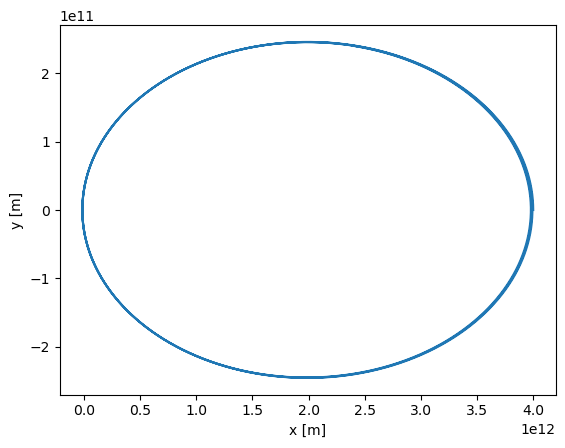

In [134]:
N = 200000
h = (tf - t0) / N


t = arange(t0, tf, h)
x_pontos = []
y_pontos = []
r = array([x0, vx, y0, vy], float)

for i in t:
    x_pontos.append(r[0])
    y_pontos.append(r[2])
    r = rk4(i,r, h)

plt.plot(x_pontos, y_pontos)
plt.xlabel('x [m]')
plt.ylabel('y [m]')

Para escolher o h, escolhi um tempo inicial e um final me baseando no tempo que o próprio Netuno leva para orbitar o Sol (~165 anos). Quando escolho um h menor que isso, a trajetória só mostra parte da orbita, com um h pequeno o suficiente, a orbita eliptica se parece com uma reta.

In [135]:
### c) e d)

In [136]:
# Constantes com anos em vez de segundo
m_sun = 1.989 * 10 ** 30  # kg
G = 66374.2  # in m^3/ kg*yr^2
x_0 = 4 * 10 ** 12  # m
y_0 = 0
v_x = 0
v_y = 15768000000  # m/anos
t_0 = 0
t_f = 165  # anos

In [137]:
def f(r, t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x**2 + y**2)
    return array([vx, - G * M * x / dist ** 3, vy, - G * M * y / dist ** 3], float)

def passo_tempo(r, t, h):
    def rk4_passo(r, t, h):
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        return (k1 + 2 * k2 + 2 * k3 + k4) / 6

    delta_step_1 = rk4_passo(r, t, h)
    delta_step_2 = rk4_passo(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2

    delta_r2 = rk4_passo(r, t, 2 * h)

    delta_x1 = delta_r1[0]
    delta_x2 = delta_r2[0]
    delta_y1 = delta_r1[2]
    delta_y2 = delta_r2[2]
    error = sqrt((delta_x1 - delta_x2) ** 2 + (delta_y1 - delta_y2) ** 2) / 30

    rho = h * delta / error

    factor = power(rho, 1 / 4)

    if  rho >= 1:
        t = t + 2 * h

        if factor > 2:
            h *= 2
        else:
            h *= factor

        delta_r1[0] += (delta_x1 - delta_x2) / 15
        delta_r1[2] += (delta_y1 - delta_y2) / 15
        return delta_r1, h, t

    else:
        return passo_tempo(r, t, factor * h)


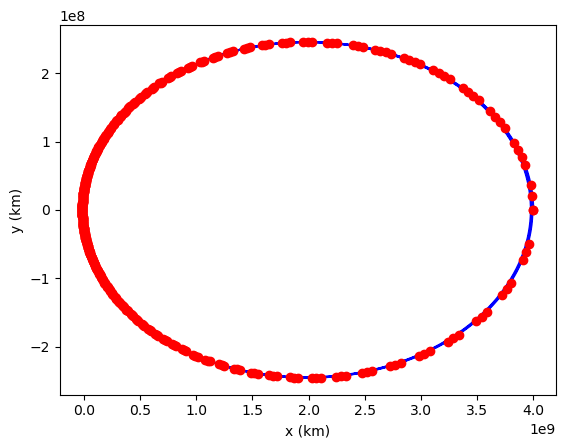

In [138]:
delta = 1
h = (t_f - t_0) / 20000

tpoints = []
xpoints2 = []
ypoints2 = []

r = array([x_0, v_x, y_0, v_y], float)  
t = t0

while(t < t_f):
    tpoints.append(t)
    xpoints2.append(r[0])
    ypoints2.append(r[2])
    delta_r, h, t = passo_tempo(r, t, h)
    r += delta_r


plt.plot(array(xpoints, float) / 1000, array(ypoints, float) / 1000, 'b')
plt.plot(array(xpoints2, float)[::20] / 1000, array(ypoints2[::20], float) / 1000, 'ro')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.show()

Usando o método adaptativo é possível perceber um tempo computacional menor, com maior precisão, já que o método adaptativo usa do comportamento da função para saber quando variar o tamanho do passo.

#### Problema 2

In [160]:
def f(r,t):
    x = r[0]
    y = r[1]    
    fx = y
    fy = y**2 -x -5
    
    return array([fx,fy], float)

def leapfrog(rti,rtsi,t,h):
    rti = rti + h*f(rtsi,t+h/2) 
    rtsi = rtsi + h*f(rti,t+h) 
    return rti, rtsi

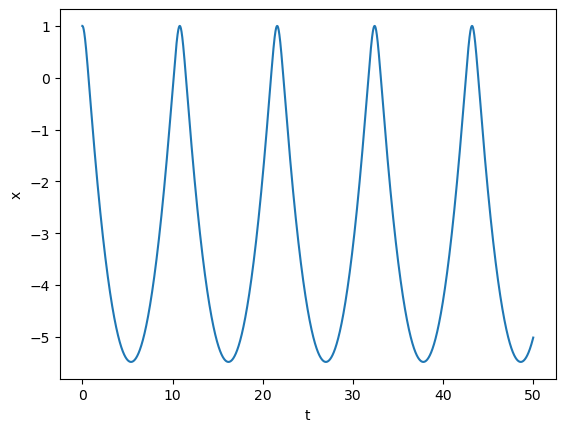

In [161]:
a = 0
b = 50
h = 0.001

x = 1 
y = 0 
rti = array([x,y], float) 

xsi = x + (h/2)*y 
ysi = y + (h/2)*(y**2 - x - 5) 
rtsi = array([xsi,ysi], float) 
x_pontos = [] 
tempos = [] 
t = a 

while t<b: 
    x_pontos.append(rti[0])
    tempos.append(t)
    rti, rtsi = leapfrog(rti,rtsi,t,h) 
    t+=h

plt.plot(tempos,x_pontos) 
plt.xlabel('t')
plt.ylabel('x')
plt.show()


#### Problema 3

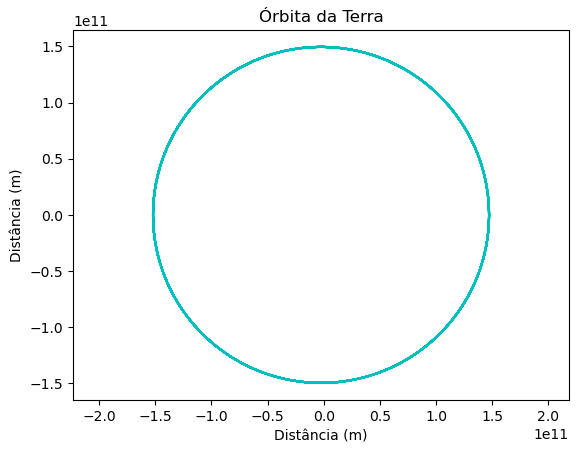

In [148]:
### a)
G = 6.6738e-11
M_sol = 1.9891e30
R = 1.4710e11
velocidade = 3.0287e4
h = 3600

r = array([R, 0]) 
v = array([0, velocidade])  

posicoes = [r]

def verlet(r, v, h):
    a = -G * M_sol * r / linalg.norm(r)**3
    r_new = r + h * v + 0.5 * h**2 * a
    a_new = -G * M_sol * r_new / linalg.norm(r_new)**3
    v_new = v + 0.5 * h * (a + a_new)
    return r_new, v_new

num_steps = 100000  
for _ in range(num_steps):
    r, v = verlet(r, v, h)
    posicoes.append(r)

posicoes = array(posicoes)

# Plotando a órbita
plt.plot(posicoes[:, 0], posicoes[:, 1], c='c')
plt.xlabel('Distância (m)')
plt.ylabel('Distância (m)')
plt.title('Órbita da Terra')
plt.axis('equal')  
plt.show()

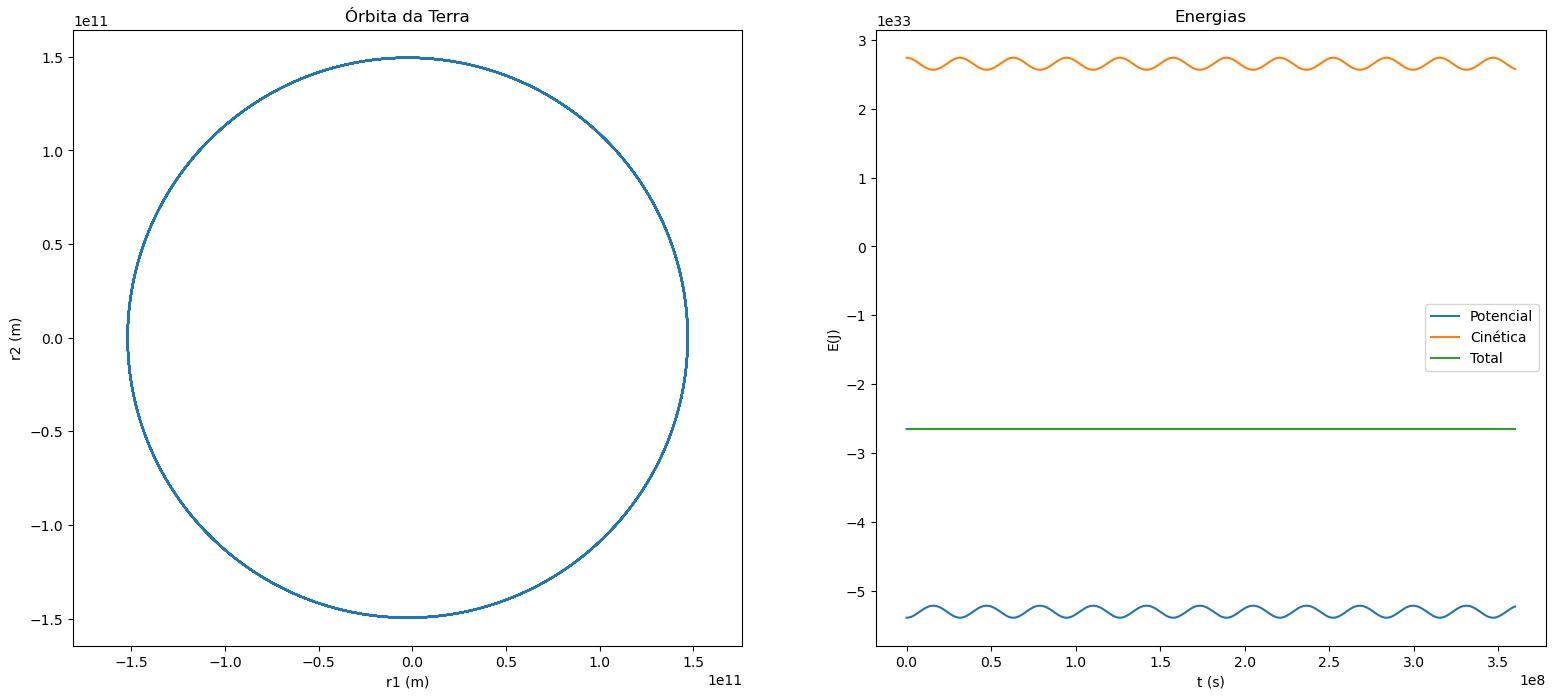

In [151]:
#b)
m_terra = 5.9722e24  

r = array([R, 0])
v = array([0, velocidade])

posicoes = [r]
velocidades = [v]
e_potencial_t = []
e_cinetica_t = []
e_total_t = []

num_steps = 100000
for i in range(num_steps):
    r, v = verlet(r, v, h)
    posicoes.append(r)
    velocidades.append(v)
    
    energia_potencial = -G * M_sol * m_terra / linalg.norm(r)
    energia_cinetica = 0.5 * m_terra * dot(v, v)
    energia_total = energia_potencial + energia_cinetica
    
    e_potencial_t.append(energia_potencial)
    e_cinetica_t.append(energia_cinetica)
    e_total_t.append(energia_total)


posicoes = array(posicoes)
velocidades = array(velocidades)
e_potencial_t = array(e_potencial_t)
e_cinetica_t = array(e_cinetica_t)
e_total_t = array(e_total_t)


fig, ax = plt.subplots(1,2, figsize=(19, 8))

ax[0].plot(posicoes[:, 0], posicoes[:, 1])
ax[0].set_xlabel('r1 (m)')
ax[0].set_ylabel('r2 (m)')
ax[0].set_title('Órbita da Terra')
ax[0].axis('equal')

ax[1].plot(arange(num_steps)*h, e_potencial_t, label='Potencial')
ax[1].plot(arange(num_steps)*h, e_cinetica_t, label='Cinética')
ax[1].plot(arange(num_steps)*h, e_total_t, label='Total')
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel('E(J)')
ax[1].set_title('Energias')

plt.legend()

Text(0, 0.5, 'Energia (J)')

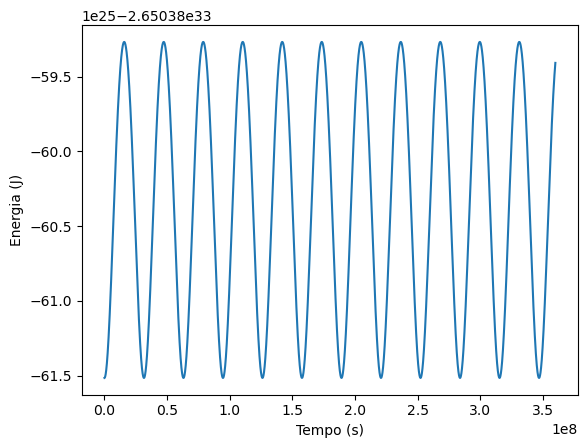

In [154]:
### c)
plt.plot(arange(num_steps)*h, e_total_t, label='Total')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')


#### Problema 4

In [159]:
m = 1.0  
R = 0.08  
v0 = 100.0  
rho = 1.22  
C = 0.47  
g = 9.81  
target_distance = 200.0  
tol = 1.0e-10  
a, b = 0.0, pi/2  
h = 0.01  


def f(y, t):
    x, y, vx, vy = y
    v = sqrt(vx**2 + vy**2)
    fx = -0.5 * rho * C * pi * R**2 * vx * v / m
    fy = -g - 0.5 * rho * C * pi * R**2 * vy * v / m
    return array([vx, vy, fx, fy])

def rk4(t, r):
    K1 = h * f(r, t)
    K2 = h * f(r + K1/2, t + h/2)
    K3 = h * f(r + K2/2, t + h/2) 
    K4 = h * f(r + K3, t + h)
    return r + (K1 + 2*K2 + 2*K3 + K4) / 6

def simulate_shot(angle):
    t = 0
    x, y = 0.0, 0.0
    vx = v0 * cos(angle)
    vy = v0 * sin(angle)
    r = array([x, y, vx, vy])
    
    while r[1] >= 0:  
        r = rk4(t, r)
        t += h
        if r[0] >= target_distance and r[1] <= 0:
            break
    
    return r[0] - target_distance  


def metodo_bissecao(f, a, b, tol):
    erro = 100
    count = 0
    while erro > tol:
        c = (a + b) / 2
        if f(c) * f(a) > 0:
            a = c
        else:
            b = c
        erro = abs(b - a) / 2
        count += 1
    return (a + b) / 2

def t_funcao(angle):
    return simulate_shot(angle)


angulo = metodo_bissecao(t_funcao, a, b, tol)
angulo2 = degrees(angulo)
print(f"O ângulo usado para atingir o alvo é {angulo2:.2f} graus.")

O ângulo usado para atingir o alvo é 15.19 graus.
